In [1]:
# Review worksheet 10 problem 1a

import numpy as np
import matplotlib.pyplot as plt
from math import *

T = 2 
S0 = 100 
K = 90
L = 120
r = 0.02
sigma = 0.2

def normcdf(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0


def callBS(S,K,T, sigma, r):
    d_plus = ((r + 1/2 * sigma**2) * T - log(K/S))/ (sigma * sqrt(T) )
    d_minus = ((r - 1/2 * sigma**2) * T - log(K/S))/ (sigma * sqrt(T) )
    return S * normcdf(d_plus) - K * exp(-r*T) * normcdf(d_minus)


def H(t,alpha, zero, k, b):
    zero = 0
    if k < b:
        return (np.exp(t*alpha**2/2)*(normcdf((t*alpha - b)/np.sqrt(t)) + np.exp(2*alpha*b)*(normcdf((-t*alpha - b)/np.sqrt(t)) 
                                  - normcdf((-t*alpha - 2*b + k)/np.sqrt(t))) ) )
    else:
        return np.exp(t*alpha**2/2)*normcdf((t*alpha - k)/np.sqrt(t))

def barrier_up_out_call(S, K, L, T, sigma, r):
    alpha = (r-1/2*sigma**2)/sigma
    w = (np.exp(-(r+1/2*alpha**2)*T ) * (S*H(T, alpha + sigma, 0, np.log(K/S)/sigma, np.log(L/S)/sigma) 
                                         - K*H(T, alpha, 0, np.log(K/S)/sigma, np.log(L/S)/sigma) ))
    if S < L:
        return callBS(S,K,T, sigma, r) - w
    else:
        return 0

print("The theoretical price of the barrier up and out call option is :", 
      "{:.5f}".format(barrier_up_out_call(S0, K, L, T, sigma, r)))

The theoretical price of the barrier up and out call option is : 1.70131


In [2]:
# Review worksheet 10 problem 1b

def delta_barrier_call(S, K, L, T, sigma, r):
    epsilon = 0.01
    return 1/epsilon*(barrier_up_out_call(S+epsilon, K, L, T, sigma, r)-barrier_up_out_call(S, K, L, T, sigma, r))

def gamma_barrier_call(S, K, L, T, sigma, r):
    epsilon = 0.01
    return 1/epsilon**2*(barrier_up_out_call(S+epsilon, K, L, T, sigma, r)+barrier_up_out_call(S-epsilon, K, L, T, sigma, r)
                        -2*barrier_up_out_call(S, K, L, T, sigma, r))

def theta_barrier_call(S, K, L, T, sigma, r):
    epsilon = 0.01
    return -1/epsilon*(barrier_up_out_call(S, K, L, T+epsilon, sigma, r)-barrier_up_out_call(S, K, L, T, sigma, r))

V = barrier_up_out_call(S0, K, L, T, sigma, r)
theta = theta_barrier_call(S0, K, L, T, sigma, r)
delta = delta_barrier_call(S0, K, L, T, sigma, r)
gamma = gamma_barrier_call(S0, K, L, T, sigma, r)
PDE = -r*V + theta + delta * r * S0 + 1/2*gamma* sigma**2 * S0**2

print("The plug in value of the PDE is :", 
      "{:.5f}".format(PDE))

The plug in value of the PDE is : -0.00521


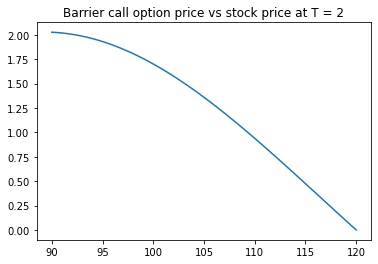

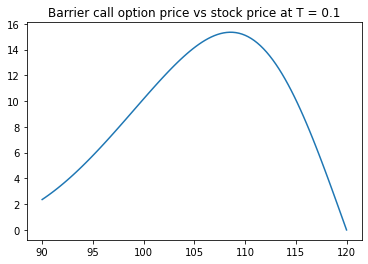

In [3]:
# Review worksheet 10 problem 1c, 1d
n = 100
S = np.linspace(90,120,n)
V_c = np.zeros(n)
V_d = np.zeros(n)

for i in range(n):
    V_c[i] = barrier_up_out_call(S[i], K, L, 2, sigma, r)
    V_d[i] = barrier_up_out_call(S[i], K, L, 0.1, sigma, r)

p1 = plt.figure(1)
plt.plot(S, V_c)
plt.title('Barrier call option price vs stock price at T = 2');

p2 = plt.figure(2)
plt.plot(S, V_d)
plt.title('Barrier call option price vs stock price at T = 0.1');

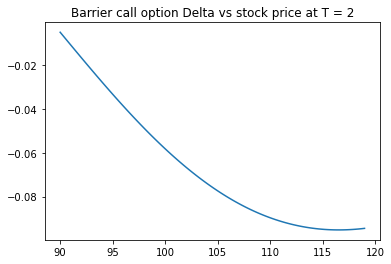

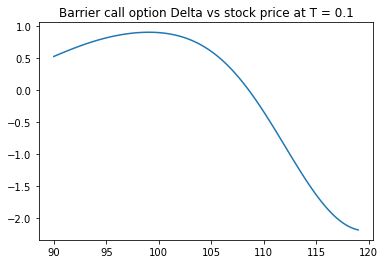

In [4]:
# Review worksheet 10 problem 1e, 1f
n = 100
S = np.linspace(90,119,n) # We avoid S = 120 as Delta is not defined there
Delta_e = np.zeros(n)
Delta_f = np.zeros(n)

for i in range(n):
    Delta_e[i] = delta_barrier_call(S[i], K, L, 2, sigma, r)
    Delta_f[i] = delta_barrier_call(S[i], K, L, 0.1, sigma, r)

p1 = plt.figure(1)
plt.plot(S, Delta_e)
plt.title('Barrier call option Delta vs stock price at T = 2');

p2 = plt.figure(2)
plt.plot(S, Delta_f)
plt.title('Barrier call option Delta vs stock price at T = 0.1');

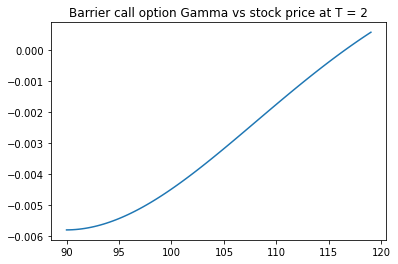

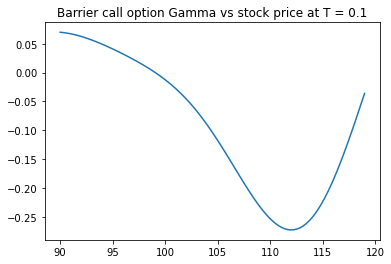

In [5]:
# Review worksheet 10 problem 1g, 1h
n = 100
S = np.linspace(90,119,n) # We avoid S = 120 as Gamma is not defined there
Gamma_g = np.zeros(n)
Gamma_h = np.zeros(n)

for i in range(n):
    Gamma_g[i] = gamma_barrier_call(S[i], K, L, 2, sigma, r)
    Gamma_h[i] = gamma_barrier_call(S[i], K, L, 0.1, sigma, r)

p1 = plt.figure(1)
plt.plot(S, Gamma_g)
plt.title('Barrier call option Gamma vs stock price at T = 2');

p2 = plt.figure(2)
plt.plot(S, Gamma_h)
plt.title('Barrier call option Gamma vs stock price at T = 0.1');

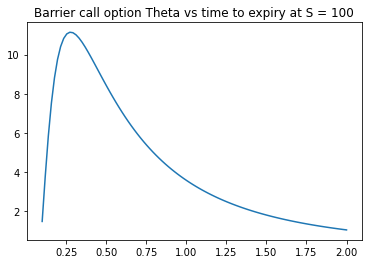

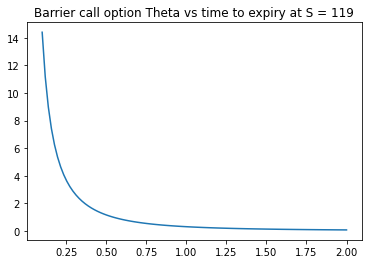

In [7]:
# Review worksheet 10 problem 1i, 1j
n = 100
T = np.linspace(0.1,2,n) # We avoid T = 0 as theta is not defined there
theta_i = np.zeros(n)
theta_j = np.zeros(n)

for i in range(n):
    theta_i[i] = theta_barrier_call(100, K, L, T[i], sigma, r)
    theta_j[i] = theta_barrier_call(119, K, L, T[i], sigma, r)

p1 = plt.figure(1)
plt.plot(T, theta_i)
plt.title('Barrier call option Theta vs time to expiry at S = 100');

p2 = plt.figure(2)
plt.plot(T, theta_j)
plt.title('Barrier call option Theta vs time to expiry at S = 119');

In [8]:
# Review worksheet 10 problem 1k

S0 = 119
T = 0.1

V = barrier_up_out_call(S0, K, L, T, sigma, r)
theta = theta_barrier_call(S0, K, L, T, sigma, r)
delta = delta_barrier_call(S0, K, L, T, sigma, r)
gamma = gamma_barrier_call(S0, K, L, T, sigma, r)

print("V is ", "{:.5f}".format(V))
print("Theta is ", "{:.5f}".format(theta))
print("Delta is ", "{:.5f}".format(delta))
print("Gamma is ", "{:.5f}".format(gamma))

# Theta and Delta are all relatively large, indicating that the stock price is very sensitive to change in stock price
# and change in time. Delta is large because option price is around the same size as delta, indicating that a unit change
# in stock price is equal to 100 % change in option value.

V is  2.19819
Theta is  14.40049
Delta is  -2.18945
Gamma is  -0.03609
